In [1]:
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# Let's make some random data

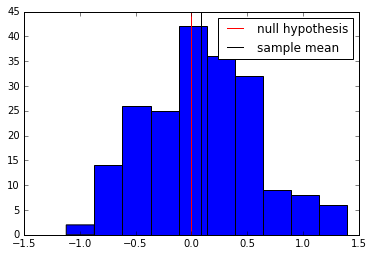

In [11]:
# normal distribution data, mean = 1.5, std = 0.7
data_normal = np.random.normal(0.05, 0.5, size=200)
_=plt.hist(data_normal)
_=plt.axvline(0,color='red',label='null hypothesis')
_=plt.axvline(np.mean(data_normal),color='black',label='sample mean')
_=plt.legend()

## parametric one sample t test with scipy

In [12]:
stats.ttest_1samp(data_normal,0,)

Ttest_1sampResult(statistic=2.346846295812568, pvalue=0.019915964316412751)

## nonparametric one sample t test (wilcox) with scipy 

In [13]:
stats.wilcoxon(data_normal,)

WilcoxonResult(statistic=8410.0, pvalue=0.0453838662691659)

## nonparametric one sample t

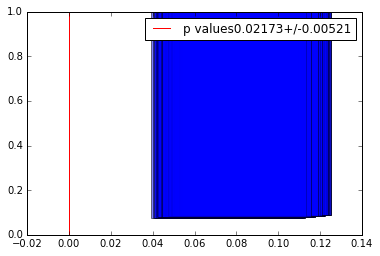

In [16]:
results = []
plt.close('all')
fig, ax = plt.subplots()
for ii in range(100):# do this 100 times
    data_subset = np.random.choice(data_normal,size=int(data_normal.size*.99),replace=False)
    p = stats.ttest_1samp(data_subset,0)
    results.append(p)
    ax.axvspan(np.mean(data_subset)-np.std(data_subset)/np.sqrt(data_subset.size),
               np.mean(data_subset)+np.std(data_subset)/np.sqrt(data_subset.size),
              np.mean(data_subset),alpha=0.5)
results = np.array(results)
ax.axvline(0,color='red',label='p values%.5f+/-%.5f'%(np.mean(results[:,-1]),np.std(results[:,-1])))
ax.legend()

In [55]:
for portion in np.arange(0.5,0.9,0.01):
    results = []
    for ii in range(100):# do this 100 times
        data_subset = np.random.choice(data_normal,size=int(data_normal.size*portion),replace=False)
        p = stats.ttest_1samp(data_subset,0)
        results.append(p)
        ax.axvspan(np.mean(data_subset)+np.std(data_subset),np.mean(data_subset)+np.std(data_subset),
                  np.mean(data_subset))
    results = np.array(results)
    print('using %.2f%% of the data and the p values is %.5f+/-%.5f'%(portion,np.mean(results[:,-1]),np.std(results[:,-1])))

using 0.50% of the data and the p values is 0.16532+/-0.17461
using 0.51% of the data and the p values is 0.15782+/-0.16850
using 0.52% of the data and the p values is 0.16547+/-0.19655
using 0.53% of the data and the p values is 0.15600+/-0.18448
using 0.54% of the data and the p values is 0.15704+/-0.15269
using 0.55% of the data and the p values is 0.15909+/-0.20247
using 0.56% of the data and the p values is 0.13480+/-0.16929
using 0.57% of the data and the p values is 0.13439+/-0.14184
using 0.58% of the data and the p values is 0.13324+/-0.13224
using 0.59% of the data and the p values is 0.12186+/-0.14304
using 0.60% of the data and the p values is 0.13372+/-0.15479
using 0.61% of the data and the p values is 0.11408+/-0.12382
using 0.62% of the data and the p values is 0.14276+/-0.19463
using 0.63% of the data and the p values is 0.11617+/-0.11335
using 0.64% of the data and the p values is 0.11433+/-0.12008
using 0.65% of the data and the p values is 0.11513+/-0.13499
using 0.

# now let's do the extract same thing with data from different distributions

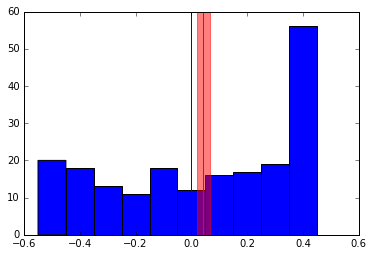

In [42]:
# make beta distributed data whose mean is close to 0
data = np.random.beta(0.8,0.5,size=200)-0.55
_=plt.hist(data)
_=plt.axvline(0,label='null hypothesis')
_=plt.axvline(np.mean(data),color='red',label='sample mean')
_=plt.axvspan(np.mean(data)-np.std(data)/np.sqrt(data.size),
             np.mean(data)+np.std(data)/np.sqrt(data.size),
             color='red',alpha=0.5)

In [43]:
stats.ttest_1samp(data,0)

Ttest_1sampResult(statistic=1.8465325435356308, pvalue=0.066299957272658291)

In [45]:
stats.wilcoxon(data)

WilcoxonResult(statistic=8649.0, pvalue=0.087366066309864279)

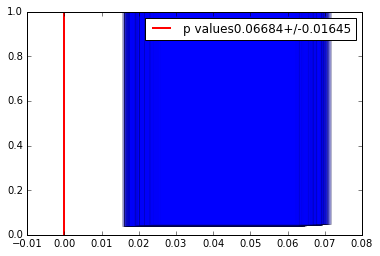

In [51]:
results = []
plt.close('all')
fig, ax = plt.subplots()
for ii in range(100):# do this 100 times
    data_subset = np.random.choice(data,size=int(data_normal.size*.99),replace=False)
    p = stats.ttest_1samp(data_subset,0)
    results.append(p)
    ax.axvspan(np.mean(data_subset)-np.std(data_subset)/np.sqrt(data_subset.size),
               np.mean(data_subset)+np.std(data_subset)/np.sqrt(data_subset.size),
              np.mean(data_subset),alpha=0.2)
results = np.array(results)
ax.axvline(0,color='red',label='p values%.5f+/-%.5f'%(np.mean(results[:,-1]),np.std(results[:,-1])),lw=2,alpha=1)
ax.set(xlim=(-0.01,0.08))
ax.legend()

In [54]:
for portion in np.arange(0.5,0.9,0.01):
    results = []
    for ii in range(100):# do this 100 times
        data_subset = np.random.choice(data_normal,size=int(data.size*portion),replace=False)
        p = stats.ttest_1samp(data_subset,0)
        results.append(p)
        ax.axvspan(np.mean(data_subset)+np.std(data_subset),np.mean(data_subset)+np.std(data_subset),
                  np.mean(data_subset))
    results = np.array(results)
    print('using %.2f%% of the data and the p values is %.5f+/-%.5f'%(portion,np.mean(results[:,-1]),np.std(results[:,-1])))

using 0.50% of the data and the p values is 0.18119+/-0.20585
using 0.51% of the data and the p values is 0.16288+/-0.19953
using 0.52% of the data and the p values is 0.14445+/-0.15530
using 0.53% of the data and the p values is 0.12955+/-0.15401
using 0.54% of the data and the p values is 0.13575+/-0.12568
using 0.55% of the data and the p values is 0.12583+/-0.13190
using 0.56% of the data and the p values is 0.15660+/-0.18042
using 0.57% of the data and the p values is 0.16068+/-0.15912
using 0.58% of the data and the p values is 0.14275+/-0.13715
using 0.59% of the data and the p values is 0.12442+/-0.13453
using 0.60% of the data and the p values is 0.08610+/-0.11482
using 0.61% of the data and the p values is 0.12974+/-0.14416
using 0.62% of the data and the p values is 0.14554+/-0.15998
using 0.63% of the data and the p values is 0.10270+/-0.10981
using 0.64% of the data and the p values is 0.13326+/-0.13702
using 0.65% of the data and the p values is 0.11287+/-0.12008
using 0.